<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [13]:
!pip install pandas

In [14]:
!pip install matplotlib

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 158.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 197.6 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.preprocessing import MinMaxScaler

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [20]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [21]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [22]:
## Write your code here

# Identify duplicate rows in the dataframe
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate rows in the dataframe:")
print(duplicate_rows)

# Remove duplicate rows from the dataframe
df_cleaned = df.drop_duplicates()

# Verify by checking the number of duplicate rows after removal
duplicate_count_after_removal = df_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows after removal: {duplicate_count_after_removal}")

Duplicate rows in the dataframe:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncH

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [23]:
## Write your code here

# Identify missing values in the 'CodingActivities' column
missing_coding_activities = df['CodingActivities'].isnull().sum()

# Display the number of missing values in the 'CodingActivities' column
print(f"Number of missing values in 'CodingActivities' column: {missing_coding_activities}")

Number of missing values in 'CodingActivities' column: 10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [24]:
## Write your code here

# Impute missing values in 'CodingActivities' column using forward-fill
df['CodingActivities'] = df['CodingActivities'].fillna(method='ffill')

# Verify the imputation by checking if there are any missing values left
missing_coding_activities_after_imputation = df['CodingActivities'].isnull().sum()

# Display the number of missing values after imputation
print(f"Number of missing values in 'CodingActivities' after forward-fill: {missing_coding_activities_after_imputation}")

Number of missing values in 'CodingActivities' after forward-fill: 0


/tmp/ipykernel_132/4211584203.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CodingActivities'] = df['CodingActivities'].fillna(method='ffill')


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [25]:
## Write your code here

# Specify the compensation-related columns explicitly
compensation_columns = ['CompTotal', 'ConvertedCompYearly']

# Display the specified compensation columns
print("Identified compensation columns:")
print(compensation_columns)

Identified compensation columns:
['CompTotal', 'ConvertedCompYearly']


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [30]:
## Write your code here

# MinMaxScaler
scaler = MinMaxScaler()

# Normalize the 'ConvertedCompYearly' column
df['ConvertedCompYearly_MinMax'] = scaler.fit_transform(df[['ConvertedCompYearly']])

# Display the first few rows of the new normalized column
print(df[['ConvertedCompYearly_MinMax']].head())

   ConvertedCompYearly_MinMax
0                         NaN
1                         NaN
2                         NaN
3                         NaN
4                         NaN


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [32]:
## Write your code here

# Calculate the Z-scores for 'ConvertedCompYearly'
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].mean()) / df['ConvertedCompYearly'].std()

# Display the first few rows of the dataset with the new Z-score column
print(df[['ConvertedCompYearly_Zscore']].head())

   ConvertedCompYearly_Zscore
0                         NaN
1                         NaN
2                         NaN
3                         NaN
4                         NaN


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


In [34]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

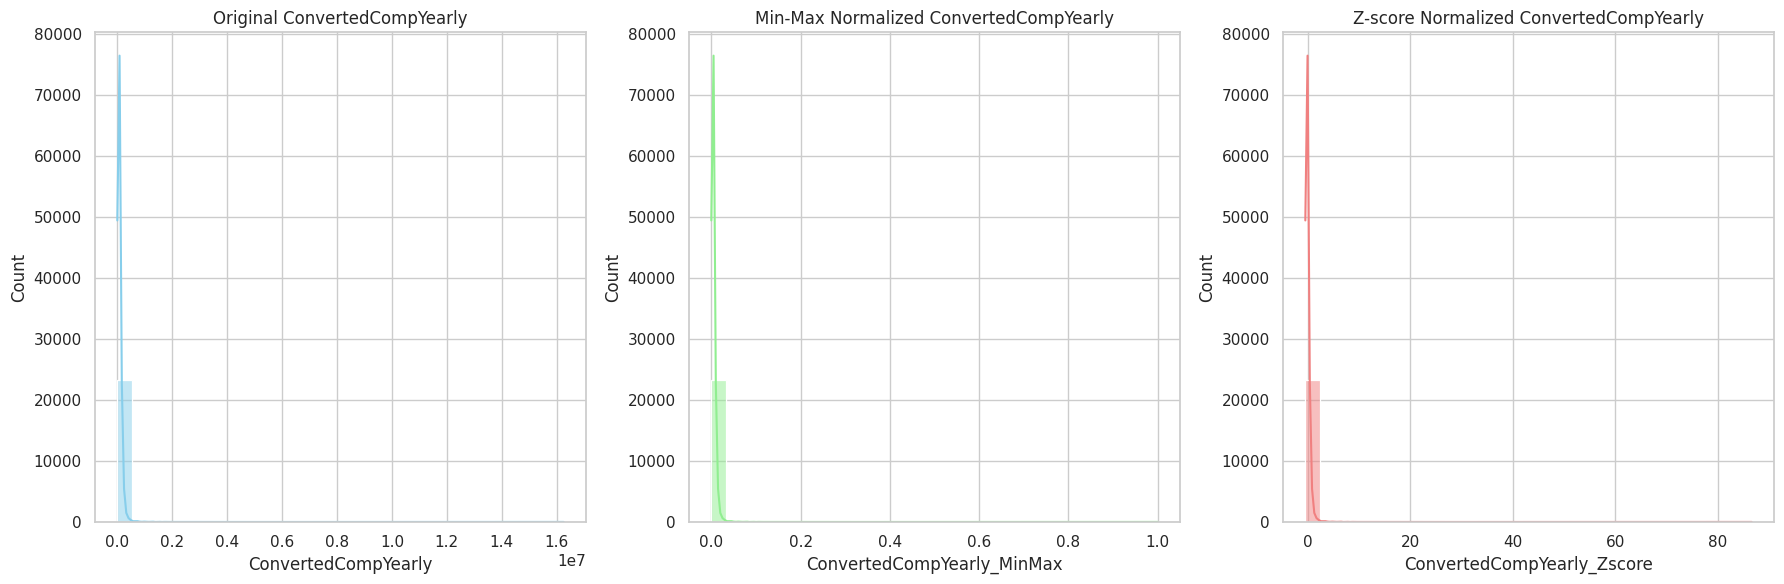

In [36]:
## Write your code here

# Set up the plotting style
sns.set(style="whitegrid")

# Create a figure with 3 subplots
plt.figure(figsize=(18, 6))

# Histogram for the original 'ConvertedCompYearly'
plt.subplot(1, 3, 1)
sns.histplot(df['ConvertedCompYearly'], kde=True, color='skyblue', bins=30)
plt.title('Original ConvertedCompYearly')

# Histogram for the 'ConvertedCompYearly_MinMax' (normalized)
plt.subplot(1, 3, 2)
sns.histplot(df['ConvertedCompYearly_MinMax'], kde=True, color='lightgreen', bins=30)
plt.title('Min-Max Normalized ConvertedCompYearly')

# Histogram for the 'ConvertedCompYearly_Zscore' (Z-score normalized)
plt.subplot(1, 3, 3)
sns.histplot(df['ConvertedCompYearly_Zscore'], kde=True, color='lightcoral', bins=30)
plt.title('Z-score Normalized ConvertedCompYearly')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
